In [ ]:
""" Importing Required Libraries """

# Dataset
from sklearn.datasets import fetch_20newsgroups

# Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Evaluation
from sklearn import metrics

# Clustering Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering

# Dimensionality Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import NMF
from sklearn.decomposition import KernelPCA

# Miscilinious
import time
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Experimenting with 3 clusters

In [ ]:
# Testing on 3 clusters
cluster_categories = [
    'comp.graphics',
    'sci.space',
    'talk.religion.misc',
]

In [ ]:
dataset = fetch_20newsgroups(subset='all', categories=cluster_categories, shuffle=False, remove=('headers', 'footers', 'quotes'))

In [ ]:
# Trainable data
data = dataset.data

In [ ]:
print(type(data))
print(len(dataset.data))

<class 'list'>
2588


In [ ]:
# Ground truth
labels = dataset.target
print(type(labels))
print(len(labels))

<class 'numpy.ndarray'>
2588


In [ ]:
# Unique ground truth
print(len(set(labels)))

3


In [ ]:
# Visualizing Data along with respective cluster
print(data[1])
print()
print(cluster_categories[labels[1]])

In regards to fractal commpression, I have seen 2 fractal compressed "movies".
They were both fairly impressive.  The first one was a 64 gray scale "movie" of
Casablanca, it was 1.3MB and had 11 minutes of 13 fps video.  It was a little
grainy but not bad at all.  The second one I saw was only 3 minutes but it
had 8 bit color with 10fps and measured in at 1.2MB.

I consider the fractal movies a practical thing to explore.  But unlike many 
other formats out there, you do end up losing resolution.  I don't know what
kind of software/hardware was used for creating the "movies" I saw but the guy
that showed them to me said it took 5-15 minutes per frame to generate.  But as
I said above playback was 10 or more frames per second.  And how else could you
put 11 minutes on one floppy disk?

comp.graphics


In [ ]:
# Visualizing Data along with respective cluster
print(data[478])
print()
print(cluster_categories[labels[478]])


/(hudson)
/If someone inflicts pain on themselves, whether they enjoy it or not, they
/are hurting themselves.  They may be permanently damaging their body.

That is true.  It is also none of your business.  

Some people may also reason that by reading the bible and being a Xtian
you are permanently damaging your brain.  By your logic, it would be OK
for them to come into your home, take away your bible, and send you off
to "re-education camps" to save your mind from ruin.  Are you ready for
that?  





/(hudson)
/And why is there nothing wrong with it?  Because you say so?  Who gave you
/the authority to say that, and set the standard for morality?

Why?

Because: 
I am a living, thinking person able to make choices for myself.
I do not "need" you to show me what you think is the way; I have observed
too many errors in your thinking already to trust you to make up the
rules for me.

Because:
I set the standard for my *own* morality, and I permit you to do 
the same for yourself.  I

Lemmatization, Stemming, Tokenization, and Stop Words removal

In [ ]:
def preprocess_data(data):
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer(language='english')
  stop_words = set(stopwords.words('english'))
  lemmatized_data = []
  for doc in data:
      word_list = word_tokenize(doc)
      lemmatized_doc = ""
      for word in word_list:
        if not word.lower() in stop_words and word.isalpha():
          word = lemmatizer.lemmatize(word)
          if word.endswith('e'):
            lemmatized_doc = lemmatized_doc + " " + word
          else:
            lemmatized_doc = lemmatized_doc + " " + stemmer.stem(word)
      lemmatized_data.append(lemmatized_doc)
  return lemmatized_data

In [ ]:
lemmatized_data = preprocess_data(data)
print(len(lemmatized_data))

2588


In [ ]:
#Comparing data before and after lemmatization
print(data[45])
print("------------------------------------------")
print(lemmatized_data[45])

Getting an image from a computer monitor to a videotape
is harder than it looks.  The standard VGA and EGA outputs are 
very different than the NTSC format used by televisions.  While
there is equipment that will do the conversion, it is hard to
get your hands on and costs quite a bit.

	If you have access to an Amiga computer, that has an
NTSC output, you can transfer certain types of graphic files by
modem and tape them from the NTSC output.  Unfortunately, this
would be frame-by-frame and would lead to unbelievably scratchy
animation unless you had a good Amiga animation program.
------------------------------------------
 get image comput monitor videotape harder look standard vga ega output differ ntsc format use televis equip convers hard get hand cost quite bit access amiga comput ntsc output transfer certain type graphic file modem tape ntsc output unfortun would would lead unbeliev scratchi anim unless good amiga anim program


TF-IDF vectorization (Feature Extraction)

In [ ]:
vectorizer = TfidfVectorizer(strip_accents='unicode', min_df=2)
X = vectorizer.fit_transform(lemmatized_data)

In [ ]:
len(vectorizer.vocabulary_)

9671

In [ ]:
X.shape

(2588, 9671)

Evaluation Function

In [ ]:
def evaluate(true_labels,predicted_label):
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(true_labels, predicted_label))
  print("Completeness: %0.3f" % metrics.completeness_score(true_labels, predicted_label))
  print("V-measure: %0.3f" % metrics.v_measure_score(true_labels, predicted_label))
  print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(true_labels, predicted_label))

In [ ]:
def frequencies_dict(cluster_index,number_of_cluster):
    if cluster_index > number_of_cluster - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [ ]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
# Plot information
def plot_confusion_matrix(cm, 
                          classes,
                          clusters,
                          title = ''):
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xtick_marks = np.arange(len(clusters))
    ytick_marks = np.arange(len(classes))
    plt.xticks(xtick_marks, clusters, rotation = 45)
    plt.yticks(ytick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')


Testing Various Algorithms

In [ ]:
number_of_cluster = len(np.unique(labels))
print(number_of_cluster)

3


In [ ]:
""" KMeans """
km = KMeans(n_clusters=number_of_cluster, init='k-means++', max_iter=100)
t0 = time.time()
km.fit(X)
print("done in %0.3fs" % (time.time() - t0))

done in 0.383s


In [ ]:
evaluate(labels,km.labels_)

Homogeneity: 0.358
Completeness: 0.413
V-measure: 0.384
Adjusted Rand-Index: 0.309


In [ ]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: file thank image graphic format program know use anyone look
Cluster 1: space would one use like think get orbit go could
Cluster 2: god christian jesus people say one moral bible would think


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


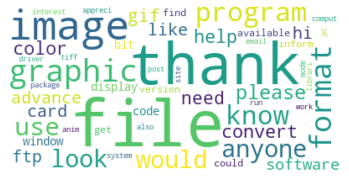

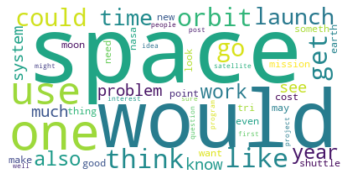

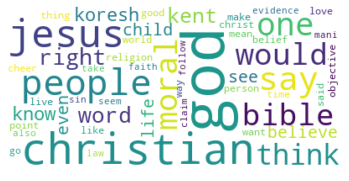

In [ ]:
for i in range(3):
    freq = frequencies_dict(i,3)
    makeImage(freq)
    print()

In [ ]:
""" Affinity Propagation """
affinity_prop = AffinityPropagation(damping=0.9)
t0 = time.time()
affinity_prop.fit(X)
print("done in %0.3fs"% (time.time()-t0))

done in 2.729s


In [ ]:
evaluate(labels,affinity_prop.labels_)

Homogeneity: 0.032
Completeness: 0.008
V-measure: 0.013
Adjusted Rand-Index: -0.000


In [ ]:
""" BIRCH """
t0 = time.time()
br = Birch(n_clusters = number_of_cluster)
br.fit(X)
print("done in %0.3fs"% (time.time()-t0))

done in 30.434s


In [ ]:
evaluate(labels,br.labels_)

Homogeneity: 0.301
Completeness: 0.365
V-measure: 0.330
Adjusted Rand-Index: 0.295


In [ ]:
""" DBSCAN """
t0 = time.time()
db = DBSCAN()
db.fit(X)
print("done in %0.3fs"% (time.time()-t0))

done in 0.244s


In [ ]:
evaluate(labels,db.labels_)

Homogeneity: 0.003
Completeness: 0.019
V-measure: 0.005
Adjusted Rand-Index: 0.001


In [ ]:
""" MiniBatch KMeans """
t0 = time.time()
mkm = MiniBatchKMeans(n_clusters = number_of_cluster)
mkm.fit(X)
print("done in %0.3fs"% (time.time()-t0))

done in 0.066s


In [ ]:
evaluate(labels,mkm.labels_)

Homogeneity: 0.249
Completeness: 0.260
V-measure: 0.255
Adjusted Rand-Index: 0.182


In [ ]:
""" Spectral Clustering """
t0 = time.time()
sc = SpectralClustering(n_clusters = number_of_cluster)
sc.fit(X)
print("done in %0.3fs"% (time.time()-t0))

done in 1.440s


In [ ]:
evaluate(labels,sc.labels_)

Homogeneity: 0.283
Completeness: 0.338
V-measure: 0.308
Adjusted Rand-Index: 0.147


**Experimenting with dimensionality reduction**

Reducing the Dimensions using Trucated SVD

In [ ]:
# LSA without normalizing
def LSA(X):
  print("Performing dimensionality reduction using LSA without normalizing...")
  t0 = time.time()
  svd = TruncatedSVD(n_components = 50)
  normalizer = Normalizer(copy = False)
  lsa = make_pipeline(svd,normalizer)
  X_lsa = lsa.fit_transform(X)
  print("Performing dimensionality reduction done in %fs" % (time.time() - t0))
  print("Total samples done: %d, Total features done: %d" % X_lsa.shape)
  return X_lsa
  

# LSA with normalizing
def LSA_normalized(X):
  print("Performing dimensionality reduction using LSA with normalizing...")
  t0 = time.time()
  svd = TruncatedSVD(n_components = 50)
  normalizer = Normalizer(copy = True)
  lsa = make_pipeline(svd, normalizer)
  normalized_X_lsa = lsa.fit_transform(X)
  print("Performing dimensionality reduction done in %fs" % (time.time() - t0))
  print("Total samples done: %d, Total features done: %d" % normalized_X_lsa.shape)
  return normalized_X_lsa


In [ ]:
x_lsa = LSA(X)
print("------------------------------")
n_x_lsa = LSA_normalized(X)

Performing dimensionality reduction using LSA without normalizing...
Performing dimensionality reduction done in 0.368907s
Total samples done: 2588, Total features done: 50
------------------------------
Performing dimensionality reduction using LSA with normalizing...
Performing dimensionality reduction done in 0.351758s
Total samples done: 2588, Total features done: 50


In [ ]:
""" KMeans """
km = KMeans(n_clusters=number_of_cluster, init='k-means++', max_iter=100)
t0 = time.time()
km.fit(x_lsa)
print("done in %0.3fs" % (time.time() - t0))
evaluate(labels,km.labels_)
print("-------------------------------------------------------")
km1 = KMeans(n_clusters=number_of_cluster, init='k-means++', max_iter=100)
t0 = time.time()
km1.fit(n_x_lsa)
print("done in %0.3fs" % (time.time() - t0))
evaluate(labels,km1.labels_)

done in 0.608s
Homogeneity: 0.465
Completeness: 0.468
V-measure: 0.466
Adjusted Rand-Index: 0.515
-------------------------------------------------------
done in 0.412s
Homogeneity: 0.461
Completeness: 0.462
V-measure: 0.462
Adjusted Rand-Index: 0.504


In [ ]:
""" Top frequency words LSA without normalization"""
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: aa abbrevi abyss able abide acc absense ab acceptable acceptance
Cluster 1: aa aaplay abandon ablut aberdeen aawin aberr abide abstact abroad
Cluster 2: aa aawin aberr aboard ab abc aberdeen absorbt abuse absorpt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
""" Top frequency words LSA with normalization"""
centroids = km1.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: aa aaplay abandon ablut aawin aberdeen abstract aberr accept abstact
Cluster 1: aa aawin aberr abolish abuse ab abide aboard aberdeen abandon
Cluster 2: aa able abbrevi absense academia abyss abolish academ acceptable abus


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
""" Affinity Propagation """
affinity_prop = AffinityPropagation(damping=0.9)
t0 = time.time()
affinity_prop.fit(x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,affinity_prop.labels_)
print("--------------------------------------------------")
affinity_prop = AffinityPropagation(damping=0.9)
t0 = time.time()
affinity_prop.fit(n_x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,affinity_prop.labels_)

done in 17.194s
Homogeneity: 0.626
Completeness: 0.137
V-measure: 0.225
Adjusted Rand-Index: 0.018
--------------------------------------------------
done in 13.283s
Homogeneity: 0.626
Completeness: 0.138
V-measure: 0.226
Adjusted Rand-Index: 0.018


In [ ]:
""" BIRCH """
t0 = time.time()
br = Birch(n_clusters = number_of_cluster)
br.fit(x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,br.labels_)
print("-------------------------------------")
t0 = time.time()
br = Birch(n_clusters = number_of_cluster)
br.fit(n_x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,br.labels_)

done in 0.380s
Homogeneity: 0.252
Completeness: 0.255
V-measure: 0.254
Adjusted Rand-Index: 0.227
-------------------------------------
done in 0.375s
Homogeneity: 0.407
Completeness: 0.426
V-measure: 0.416
Adjusted Rand-Index: 0.429


In [ ]:
""" DBSCAN """
t0 = time.time()
db = DBSCAN()
db.fit(x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,db.labels_)
print("-----------------------------------")
t0 = time.time()
db = DBSCAN()
db.fit(n_x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,db.labels_)

done in 0.106s
Homogeneity: 0.119
Completeness: 0.154
V-measure: 0.134
Adjusted Rand-Index: 0.028
-----------------------------------
done in 0.099s
Homogeneity: 0.120
Completeness: 0.156
V-measure: 0.136
Adjusted Rand-Index: 0.030


In [ ]:
""" MiniBatch KMeans """
t0 = time.time()
mkm = MiniBatchKMeans(n_clusters = number_of_cluster)
mkm.fit(x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,mkm.labels_)
print("-------------------------------------")
t0 = time.time()
mkm = MiniBatchKMeans(n_clusters = number_of_cluster)
mkm.fit(n_x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,mkm.labels_)

done in 0.138s
Homogeneity: 0.399
Completeness: 0.443
V-measure: 0.420
Adjusted Rand-Index: 0.374
-------------------------------------
done in 0.144s
Homogeneity: 0.218
Completeness: 0.325
V-measure: 0.261
Adjusted Rand-Index: 0.214


In [ ]:
""" Spectral Clustering """
t0 = time.time()
sc = SpectralClustering(n_clusters = number_of_cluster)
sc.fit(x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,sc.labels_)
print("-----------------------------------------")
t0 = time.time()
sc = SpectralClustering(n_clusters = number_of_cluster)
sc.fit(n_x_lsa)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,sc.labels_)

done in 1.200s
Homogeneity: 0.447
Completeness: 0.457
V-measure: 0.452
Adjusted Rand-Index: 0.500
-----------------------------------------
done in 1.155s
Homogeneity: 0.448
Completeness: 0.455
V-measure: 0.452
Adjusted Rand-Index: 0.504


Reducing the Dimension using Kernel PCA

In [ ]:
def reduce_dim(X):
  print("Performing dimensionality reduction usin Kernel PCA..")
  t0 = time.time()
  # svd1 = NMF(n_components = 50, random_state = 2)
  svd1=KernelPCA(n_components = 50, kernel='rbf')
  normalizer = Normalizer(copy = False)
  nmf = make_pipeline(svd1, normalizer)
  x_nmf = nmf.fit_transform(X)
  print("Performing dimensionality reduction done in %fs" % (time.time() - t0))
  return x_nmf

In [ ]:
x_nmf = reduce_dim(X)

Performing dimensionality reduction usin Kernel PCA..
Performing dimensionality reduction done in 2.353265s


In [ ]:
""" KMeans """
km = KMeans(n_clusters=number_of_cluster, init='k-means++', max_iter=100)
t0 = time.time()
km.fit(x_nmf)
print("done in %0.3fs" % (time.time() - t0))
evaluate(labels,km.labels_)

done in 0.558s
Homogeneity: 0.300
Completeness: 0.316
V-measure: 0.308
Adjusted Rand-Index: 0.333


In [ ]:
""" Affinity Propagation """
affinity_prop = AffinityPropagation(damping=0.9)
t0 = time.time()
affinity_prop.fit(x_nmf)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,affinity_prop.labels_)

done in 18.996s
Homogeneity: 0.618
Completeness: 0.136
V-measure: 0.222
Adjusted Rand-Index: 0.015


In [ ]:
""" BIRCH """
t0 = time.time()
br = Birch(n_clusters = number_of_cluster)
br.fit(x_nmf)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,br.labels_)

done in 0.393s
Homogeneity: 0.382
Completeness: 0.380
V-measure: 0.381
Adjusted Rand-Index: 0.411


In [ ]:
""" DBSCAN """
t0 = time.time()
db = DBSCAN()
db.fit(x_nmf)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,db.labels_)

done in 0.123s
Homogeneity: 0.103
Completeness: 0.141
V-measure: 0.119
Adjusted Rand-Index: 0.025


In [ ]:
""" MiniBatch KMeans """
t0 = time.time()
mkm = MiniBatchKMeans(n_clusters = number_of_cluster)
mkm.fit(x_nmf)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,mkm.labels_)

done in 0.152s
Homogeneity: 0.282
Completeness: 0.286
V-measure: 0.284
Adjusted Rand-Index: 0.305


In [ ]:
""" Spectral Clustering """
t0 = time.time()
sc = SpectralClustering(n_clusters = number_of_cluster)
sc.fit(x_nmf)
print("done in %0.3fs"% (time.time()-t0))
evaluate(labels,sc.labels_)

done in 1.205s
Homogeneity: 0.290
Completeness: 0.335
V-measure: 0.311
Adjusted Rand-Index: 0.327


**Evaluating on whole data**

Dividing 20 categories into 6 classes

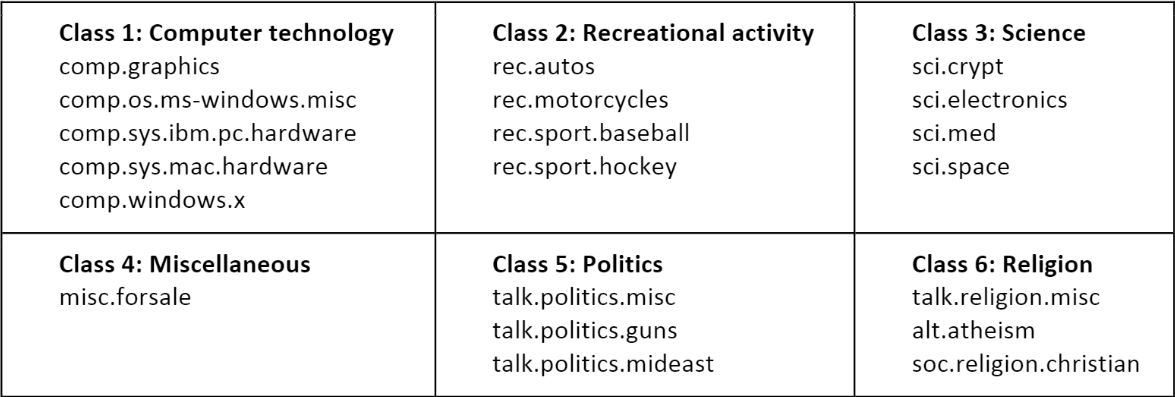

In [ ]:
categories = ['comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'comp.windows.x',	
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey',
              'sci.crypt',
              'sci.electronics',
              'sci.med',
              'sci.space',
              'misc.forsale',
              'talk.politics.misc',
              'talk.politics.guns',
              'talk.politics.mideast',
              'talk.religion.misc', 	
              'alt.atheism', 	
              'soc.religion.christian']

In [ ]:
dataset = fetch_20newsgroups(subset = 'all', 
                             categories = categories,
                             shuffle = True, 
                             random_state = 42,
                             remove = ('headers', 'footers', 'quotes'))

In [ ]:
dataset_size = len(dataset.data)
print(dataset_size)

18846


In [ ]:
for i in range(0, dataset_size):
    if(dataset.target[i] <= 4):
        dataset.target[i] = 0
    if(5 <= dataset.target[i] and dataset.target[i] <= 8):
        dataset.target[i] = 1
    if(9 <= dataset.target[i] and dataset.target[i] <= 12):
        dataset.target[i] = 2
    if(dataset.target[i] == 13):
        dataset.target[i] = 3
    if(14 <= dataset.target[i] and dataset.target[i] <= 16):
        dataset.target[i] = 4
    if(17 <= dataset.target[i] and dataset.target[i] <= 19):
        dataset.target[i] = 5

In [ ]:
data = dataset.data
labels = dataset.target

In [ ]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [ ]:
class_names = ['Computer technology',
               'Recreational activity', 
               'Science',
               'Miscellaneous', 
               'Politics', 
               'Religion']

In [ ]:
number_of_cluster = 6

In [ ]:
cluster_names = []
for i in range(number_of_cluster):
    cluster_names.append("cluster %d" % i)
print(cluster_names)

['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']


In [ ]:
""" Data Preprocessing """
lemmatized_data = preprocess_data(data)

In [ ]:
""" Vectorization """
vectorizer = TfidfVectorizer(max_df = 0.5,
                             max_features = 100000,
                             min_df = 2,
                             use_idf = True)
X = vectorizer.fit_transform(lemmatized_data)

In [ ]:
""" Dimensionality Reduction """
norm_x = LSA(X)

Performing dimensionality reduction using LSA without normalizing...
Performing dimensionality reduction done in 2.177127s
Total samples done: 18846, Total features done: 50


In [ ]:
km = KMeans(n_clusters = number_of_cluster, init = 'k-means++', max_iter=1000, n_init=1, verbose = False)
km.fit(X)
evaluate(labels,km.labels_)

Homogeneity: 0.107
Completeness: 0.131
V-measure: 0.118
Adjusted Rand-Index: 0.028


In [ ]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: would people one think get like go right time game
Cluster 1: drive card scsi disk use ide monitor driver control bus
Cluster 2: window file program use run dos problem font applic server
Cluster 3: god christian jesus bible sin say one believe christ people
Cluster 4: thank please anyone know would advance email hi help look


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


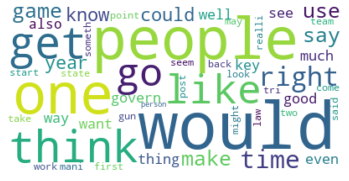

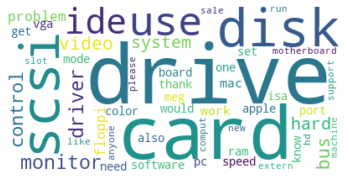

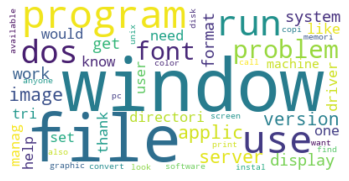

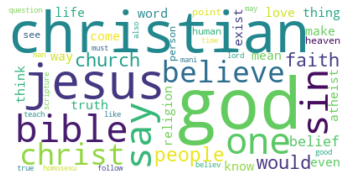

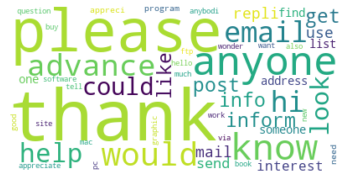

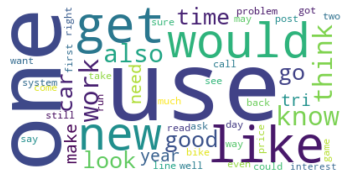

In [ ]:
for i in range(6):
    freq = frequencies_dict(i,6)
    makeImage(freq)
    print()

In [ ]:
km1 = KMeans(n_clusters = number_of_cluster, init = 'k-means++', max_iter=1000, n_init=1, verbose = False)
km1.fit(norm_x)
evaluate(labels,km1.labels_)

Homogeneity: 0.212
Completeness: 0.215
V-measure: 0.214
Adjusted Rand-Index: 0.131


In [ ]:
cm = metrics.confusion_matrix(labels, km1.labels_)
print(cm)

[[ 495    9  253 1418  422 2105]
 [1631   38   18  818  163 1281]
 [ 787 1441   11  214  613  902]
 [ 558    5   12   19  164  232]
 [ 831   17  747   81  924  294]
 [ 214   14  276   20 1586  233]]


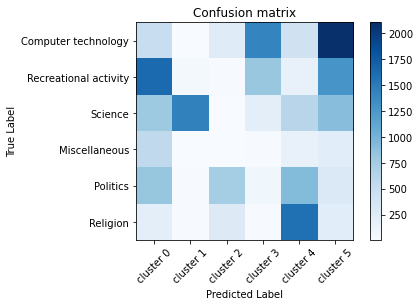

In [ ]:
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names,
                      clusters = cluster_names,
                      title = 'Confusion matrix')
plt.show()